# Classification in Python

The objective of this notebook is to exercise classification using Pythons `scikit-learn` franework. 

References:

* [Geron, A.: Hands-on machine learning with scikit-learn and tensorflow](https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)

Dataset: 

* MNIST dataset (Modified National Institute of Standards and Technology), a set of 70,000 small images of written digits. Images are size-normalized and centered into 28x28 images. For more information see the [Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database) and 
the dataset [description on OpenML](https://www.openml.org/search?type=data&status=active&id=554).

For more information on datasets available through scikit-learn, see [this page](https://scikit-learn.org/stable/datasets.html).

The MNIST dataset can be downloaded from [OpenML](https://www.openml.org/) using the helper function `fetch_openml` from `scikit-learn` as follows:

In [1]:
# load data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/home/hendrik/Documents/repos/github/pysnippets/venv/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [134]:
# packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [135]:
# extract relevant data and labels
X, y = mnist["data"], mnist["target"]

# convert label to integer
y = y.astype(np.uint8)

In [136]:
X.shape

(70000, 784)

In [137]:
y.shape

(70000,)

In [138]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

There are obviously 70,000 rows (images) with 784 columns (features) resulting from the gray-scale values of 28x28 pixels per image. The first labels indicate that the images show the digits 5, 0, 4, 1, 9. 

Let's verify this by plotting the first image using `matplotlib`.

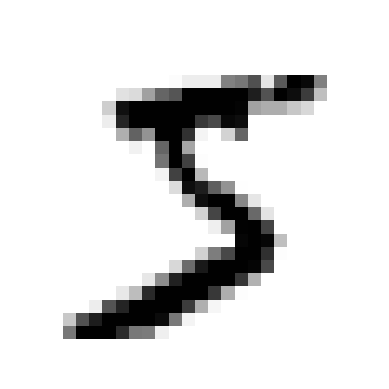

In [140]:
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

# plot
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Create a subset for faster execution and split the data for training and testing.

In [141]:
# subsampling
idx_subset = 5000
idx_train = 0.8 * idx_subset
idx_train = int(idx_train)

X_sub = X[:idx_subset]
y_sub = y[:idx_subset]

# train-test split
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X_sub[:idx_train], X_sub[idx_train:], y_sub[:idx_train], y_sub[idx_train:]

## Train a Binary Classifier

Let's train a "5-detector", i.e. a classifier if a digit is a 5 or not

In [142]:
# create the target vectors for classification
y_train_5, y_test_5 = (y_train == 5), (y_test == 5)

Stochastic Gradient Descent (SGD)

https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://scikit-learn.org/stable/modules/sgd.html

In [143]:
# train a Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [144]:
# predict example
sgd_clf.predict([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

#### Cross Validation

In [145]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95652174, 0.96099025, 0.96174044])

In [146]:
# base estimator
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [147]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90929535, 0.90772693, 0.92048012])

#### Confusion Matrix

In [148]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [149]:
y_train_pred

array([ True, False, False, ..., False, False, False])

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[3582,   68],
       [  93,  257]])

In [151]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7907692307692308

In [152]:
recall_score(y_train_5, y_train_pred)

0.7342857142857143

In [153]:
# run prediction and return scores instead of labels
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([176921.83980071])

In [154]:
# use default threshold for decision on labelling
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [155]:
# cross validation with scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [156]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [157]:
np.min(thresholds), np.max(thresholds)

(-3830907.8736652373, 1586596.6743251001)

In [158]:
np.min(y_scores), np.max(y_scores)

(-3830907.8736652373, 1586596.6743251001)

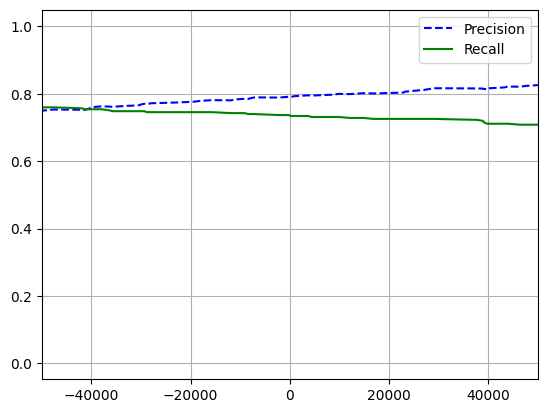

In [159]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlim(-50000,50000)
    plt.grid()
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

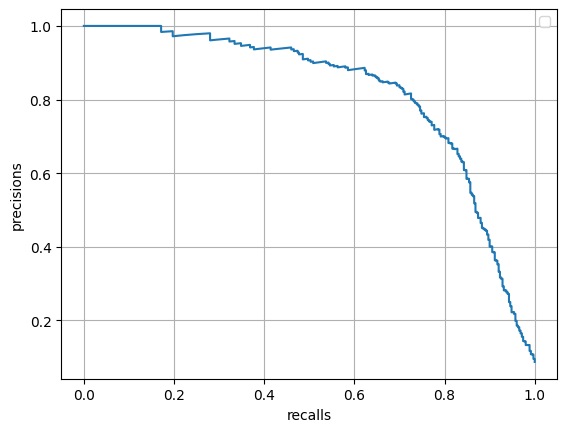

In [160]:
def plot_precision_over_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.ylabel('precisions')
    plt.xlabel('recalls')
    plt.grid()
    plt.legend()

plot_precision_over_recall(precisions, recalls)
plt.show()

#### ROC

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

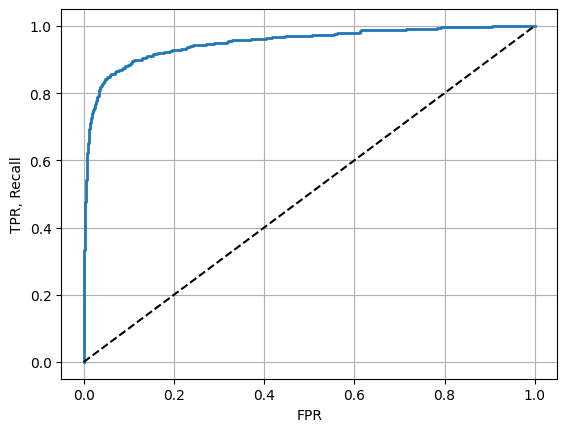

In [162]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.ylabel('TPR, Recall')
    plt.xlabel('FPR')
    plt.grid()
 
plot_roc_curve(fpr, tpr)
plt.show()

In [163]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9519091976516634

## RandomForest

We train a RF classifier for comparison.

In [164]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [165]:
y_probas_forest

array([[0.4 , 0.6 ],
       [0.95, 0.05],
       [0.97, 0.03],
       ...,
       [0.87, 0.13],
       [0.99, 0.01],
       [1.  , 0.  ]])

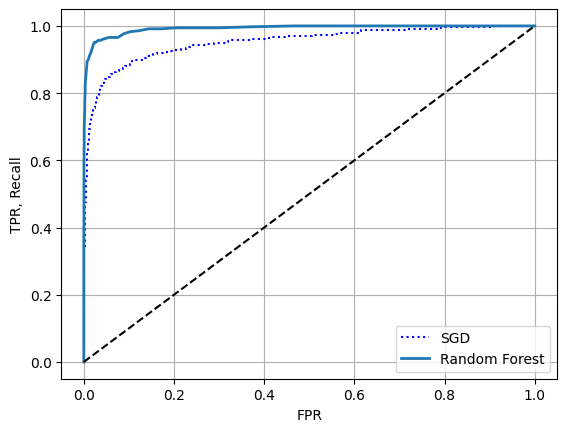

In [166]:
from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]

# score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [167]:
roc_auc_score(y_train_5, y_scores_forest)

0.9925573385518591

## Multiclass classification

Strategies:

* One-versus-all strategy (0-detector, 1-detector, ...)
* One-versus-one strategy (0-1, 0-2, 0-3, ..., 1-2, 1-3, ...)

OvA stragety using SGDClassifier:

In [168]:
sgd_clf_ova = SGDClassifier(random_state=42, loss='log_loss')
sgd_clf_ova.fit(X_train, y_train)
sgd_clf_ova.predict([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [169]:
some_digit_scores = sgd_clf_ova.decision_function([some_digit]) 
# some_digit_scores = sgd_clf_ova.predict_proba([some_digit])
some_digit_scores

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -785592.5801714 , -1004845.8241351 ,  -705512.54819929,
          -36602.25306069, -1498247.32241772,   111723.95709087,
        -1647573.48930581, -1032033.40776289,  -919225.43643145,
         -583681.6688522 ]])

In [170]:
mx = np.argmax(some_digit_scores)
sgd_clf_ova.classes_[mx]

5

In [171]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [172]:
forest_clf.predict_proba([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.01, 0.01, 0.05, 0.11, 0.01, 0.77, 0.  , 0.02, 0.  , 0.02]])

Cross validation scores of SGDClassifier

In [173]:
cross_val_score(sgd_clf_ova, X_train, y_train, cv=3, scoring="accuracy")

array([0.83958021, 0.86571643, 0.86796699])

Scaling the gray scale values to 0..1 is supposed to improve the scores.

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf_ova, X_train_scaled, y_train, cv=3, scoring="accuracy")

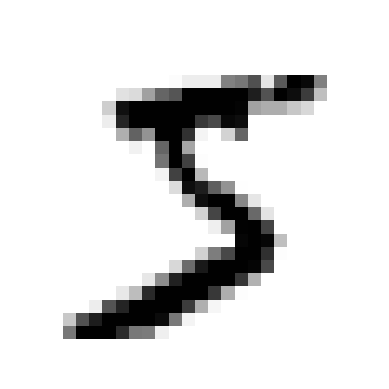

In [175]:
some_digit = X_train.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

# plot
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

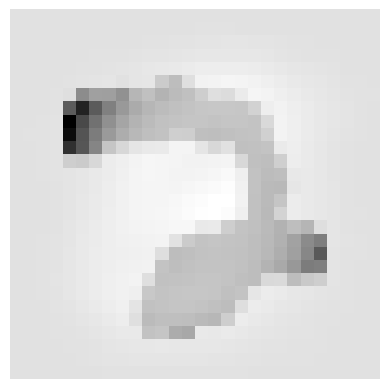

In [176]:
some_digit_scaled = X_train_scaled[120]
some_digit_image = some_digit_scaled.reshape(28, 28)

# plot
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

## Error analysis

In [177]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[359,   0,   5,   2,   0,   8,   2,   1,   2,   0],
       [  0, 413,   4,   2,   1,   1,   1,   1,  21,   0],
       [  4,   7, 334,   7,  10,   3,   4,   9,  15,   4],
       [  1,   4,  15, 325,   0,  24,   3,   7,   8,   5],
       [  5,   1,   4,   1, 392,   1,   5,   1,   7,  13],
       [  3,   3,   3,  19,  10, 274,   6,   3,  23,   6],
       [  2,   3,   7,   0,   5,   9, 376,   0,   3,   0],
       [  4,   3,   4,   2,   9,   0,   0, 382,   2,  27],
       [  2,  17,   6,   8,   2,  12,   2,   4, 311,   9],
       [  7,   3,   3,   9,  17,   3,   0,  19,   4, 332]])

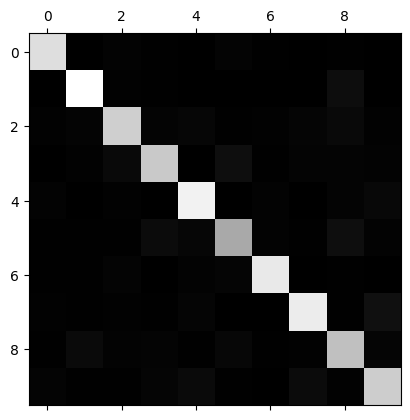

In [178]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

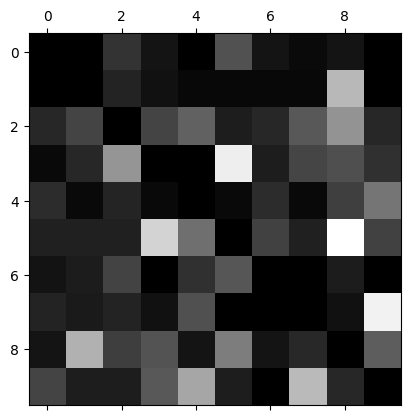

In [179]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

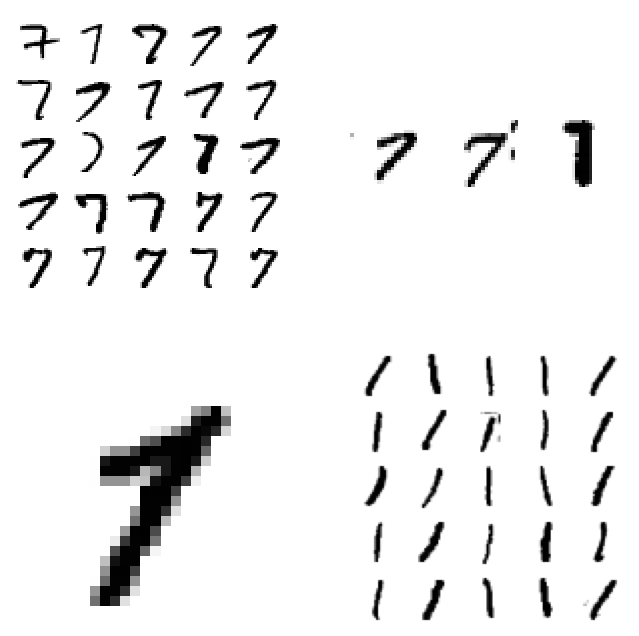

In [180]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instances.iloc[i]).reshape(size, size) for i in range(instances.shape[0])] #change done here
    
    if images_per_row == 0:
       images_per_row = 0.1
    
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")
    
    
cl_a, cl_b = 7, 1
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel classification



In [182]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [184]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9405447041041739

## Multioutput classifier

In [185]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

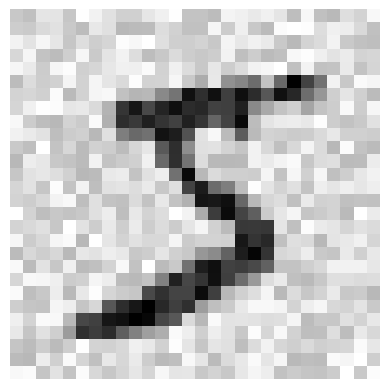

In [189]:
some_digit_noise = X_train_mod.iloc[0].to_numpy()
some_digit_image = some_digit_noise.reshape(28, 28)

# plot
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


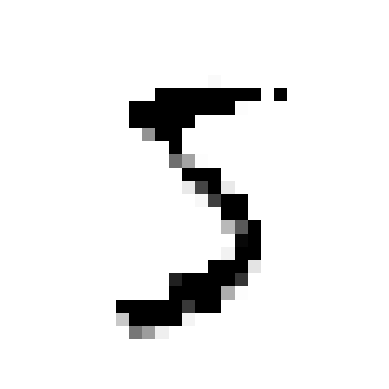

In [195]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_train_mod.iloc[0]])
some_digit_image = clean_digit.reshape(28, 28)

# plot
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()